In [49]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)



In [ ]:
SIAltTable=[i*1000 for i in [0,1,3,5,10,25,50,75,100,130,160,200,300,400,600,1000]]
SITempTable=[288.15,281.651,268.65,255.65,223.252,221.552,270.65,206.65,195.08,469.27,696.29,845.56,976.01,995.83,999.85,1000]
SIPressTable=[i*101325 for i in [1,0.887,0.66919,0.53313,0.26151,0.025158,0.00078735,0.000020408,0.00000031593,1.2341e-8,2.9997e-9,8.3628e-10,8.6557e-11,1.4328e-11,8.1056e-13,7.4155e-14]]
USAltTable=[i*3.28084 for i in SIAltTable]
USTempTable=[i*1.8 for i in SITempTable]
USPressTable=[i*0.020885434273039 for i in SIPressTable]

AltTable=SIAltTable
TempTable=SITempTable
PressTable=SIPressTable

def ChangeUnits(change):
    
    global AltTable
    global TempTable
    global PressTable
    global GasConstant
    
    if (Units_Select.value == 'Metric'): 
        gravity.value=9.81
        AltTable=SIAltTable
        TempTable=SITempTable
        PressTable=SIPressTable
        Alt_Select.options=AltTable

    elif (Units_Select.value == 'Imperial'):
        gravity.value=32.17
        AltTable=USAltTable
        TempTable=USTempTable
        PressTable=USPressTable
        Alt_Select.options=AltTable
                                  
    else:
        print('ERROR')
    
    
    
def UpdateValues(change):
    
        temperature3.value=TempTable[AltTable.index(Alt_Select.value)]
        pressure3.value=PressTable[AltTable.index(Alt_Select.value)]
        
        
def ChamberP(pambient,k,M):
    po=pambient*(1+0.5*(k-1)*M**2)**(k/(k-1))
    return po

def ExpansionRatio(k,M):
    ER=(1/M)*((1+0.5*(k-1)*M**2)/(0.5*(k+1)))**((0.5*(k+1))/(k-1))
    return ER

def AreaRatio(k,p2p1):
    AR=((k+1)/2)**(1/(k-1))*(p2p1)**(1/k)*(((k+1)/(k-1))*(1-p2p1**((k-1)/k)))**0.5
    AR=AR**-1
    return AR

def PressureRatio(k,M):
    PPo=((1+0.5*(k-1)*M**2)**(k/(k-1)))**(-1)
    return PPo

def TempRatio(k,M):
    TTo=((1+0.5*(k-1)*M**2))**(-1)
    return TTo

def PropMass(InitialM , FinalM):
    m=InitialM-FinalM
    return m

def MRVehicle(InitialM , FinalM):
    mr=FinalM/InitialM
    return mr

def MRSubSys(InitialM , FinalM , NonSysMass):
    mr=(FinalM-NonSysMass)/(InitialM-NonSysMass)
    return mr

def PMFVehicle(PropellantMass , InitialM):
    PMF=PropellantMass/InitialM
    return PMF

def PMFSubSys(PropellantMass , InitialM , NonSysMass):
    PMF=PropellantMass/(InitialM-NonSysMass)
    return PMF

def MassFlow(PropM , BurnTime):
    mflow=PropM/BurnTime
    return mflow

def WeightFlow(MFR , gravitySL):  
    WFR=MFR*gravitySL  
    return WFR

def EEV_ISP(Isp , Gravity):
    c=Isp*Gravity
    return c

def EEV_Force(Thrust , MFR):    
    c=Thrust/MFR    
    return c

def IdealThrust(C , MFR):
    F=MFR*C
    return F

def MomThrust(MFR , V2):    
    mt=MFR*V2    
    return mt

def RealThrust(MomentumThrust , PressureThrust):    
    T=MomentumThrust+PressureThrust    
    return T

def TotalImpulse(Force , Time):    
    I=Force*Time   
    return I

def Acceleration(Thrust , Mass):   
    a=Thrust/Mass    
    return a

def CStar(ChamberP , ThroatArea , MFR):    
    cstar=(ChamberP*ThroatArea)/MFR    
    return cstar

def SpecificImpulseT(Thrust , WeightFlowRate):    
    Isp=Thrust/WeightFlowRate    
    return Isp

def SpecificImpulseV(V , SpecGrav):    
    Isp=V/SpecGrav    
    return Isp

def PressThrust(p2 , p3 , A2):    
    pt=(p2-p3)*A2
    return pt

def ExhaustVmass(TotalThrust , PThrust , MFR):
    
    v=(TotalThrust-PThrust)/MFR
    
    return v

def ExhaustVMet(k,R,ToM,PR):
    v=(((2*k)/(k-1))*R*ToM*(1-((PR)**-1)**((k-1)/k)))**(1/2)
    return v

def ExhaustVUS(k,R,ToM,PR):
    v=(((2*k*32.2)/(k-1))*R*ToM*(1-((PR)**-1)**((k-1)/k)))**(1/2)
    return v

def CfIdeal(k,p2p1):
    Cf=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(p2p1)**((k-1)/k)))**0.5
    return Cf

def FindEpsln(numbers,eps):   
     numbers = np.asarray(numbers) 
     i=(np.abs(numbers - eps)).argmin() 
     return numbers[i]  



In [35]:
#Example 2.1

#Given
M0=200   #Initial Mass | Kg
Mf=130   #Mass after Rocket Operation | Kg
Ms=110   #Payload, nonpropulsive structure, etc. | Kg
Δt=3     #Rocket Operation Duration | Seconds
Isp=240  #Average Specific Impulse | Seconds
go=9.81  #Gravity | m/s^2

#Calculations
M=M0-Mf             #Delta Mass |Kg
MR=Mf/M0            #Mass Ratio | Unitless
PR=(Mf-Ms)/(M0-Ms)  #Propulsion Ratio| Unitless
ζ=M/(M0-Ms)         #Propellant Mass Fraction | Unitless
mdot=M/Δt           #Propellant Mass Flowrate | Kg/sec
V2=Isp*go           #Exhaust Velocity | m/sec
C=V2                #Effective Exhaust Velocity equals Final Velocity
F=mdot*C            #Thrust |Lbs
It=F*Δt             #Total Impulse | N-sec
Wo=(M0-Ms)*go       #Weight |N
Ratio=It/Wo         #Impulse-to-Weight Ratio
af=F/Mf             #Final Acceleration | m/sec^2

#Outputs

print("Mass Ratio=", MR)
print("Propulsion Ratio=",PR)
print("ζ=",ζ)
print("Mass Flowrate=",mdot,"kg/sec")
print("Effective Exhaust Velocity=",C,"m/sec")
print("Thrust=",F,"Lbs")
print("Total Impulse=",It,"N-sec")
print("Impulse-to-Weight Ratio=",Ratio)
print("Final Acceleration=",af,"m/sec^2")

Mass Ratio= 0.65
Propulsion Ratio= 0.2222222222222222
ζ= 0.7777777777777778
Mass Flowrate= 23.333333333333332 kg/sec
Effective Exhaust Velocity= 2354.4 m/sec
Thrust= 54936.0 Lbs
Total Impulse= 164808.0 N-sec
Impulse-to-Weight Ratio= 186.66666666666666
Final Acceleration= 422.5846153846154 m/sec^2


In [73]:
#Example 2.2

#Given
tb=40 #Burn Duration | sec
Mi=1210 #Initial Propulsion System Mass | Kg 
Mr=215  #Mass of Rocket Motor After Test | Kg
F=62250  #Sea-level Thrust | N
P1=7.00  #Chamber Pressure |MPA
P2=0.070  #Nozzle Exit Pressure | MPa
Ld=8.55  #Nozzle Throat Diameter | cm
Le=27.03  #Nozzle Exit Diameter | cm
At=0.00574 #Area Throat | m^2
A2=0.0574  #Area | m^2
P3=0.1013  #Sea-level Pressure |MPa


#Calculations
mdot=(Mi-Mr)/tb              #Steady-state Mass Flowrate |kg/sec
cstar=((P1*10**6)*At)/mdot   #Effective Exhaust Velocity | m/sec
c=F/mdot                     # m/sec
Fp=((P2-P3)*10**6)*A2        #Pressure Thrust | N
v2=(F-Fp)/mdot               #Nozzle Exit Velocity | m/sec



#Outputs
print("Mass flowrate=",mdot,"kg/sec")
print("cstar=",cstar,"m/sec")
print("c=",c,"m/sec")
print("Pressure Thrust=",Fp,"N")
print("Nozzle Exit Velocity=",v2,"m/sec")
print("Pressure at Sea-level:",101.32,"kPa")
print("Pressure Thrust at Sea-level:",-1797,"N")
print("Specific Impulse at Sea-level:",255,"sec")
print("Pressure at 1000m:",89.88,"kPa")
print("Pressure Thrust at 1000m:",-1141,"N")
print("Specific Impulse at 1000m:",258,"sec")
print("Pressure at 25,000m:",2.55,"kPa")
print("Pressure Thrust at 25,000m:",3871,"N")
print("Specific Impulse at 25,000m:",278,"sec")

Mass flowrate= 24.875 kg/sec
cstar= 1615.2763819095478 m/sec
c= 2502.5125628140704 m/sec
Pressure Thrust= -1796.6199999999997 N
Nozzle Exit Velocity= 2574.7384924623116 m/sec
Pressure at Sea-level: 101.32 kPa
Pressure Thrust at Sea-level: -1797 N
Specific Impulse at Sea-level: 255 sec
Pressure at 1000m: 89.88 kPa
Pressure Thrust at 1000m: -1141 N
Specific Impulse at 1000m: 258 sec
Pressure at 25,000m: 2.55 kPa
Pressure Thrust at 25,000m: 3871 N
Specific Impulse at 25,000m: 278 sec


#Homework 2

##Plot the variation of "Thrust" and "Specific Impulse" against "Altitude" using Atmospheric pressure information in the Appendix of the textbook.

Thrust at altitude: [194600.         197326.784016   202582.72053392 205865.96153584
 212420.37812368 218123.74852854 218711.83258942 218730.33953798
 218730.82437635 218730.8317022 ]
Specific Impulse at altitude: [254.         257.55911172 264.41937829 268.70480077 277.25989745
 284.70417331 285.47176504 285.49592108 285.49655391 285.49656348]


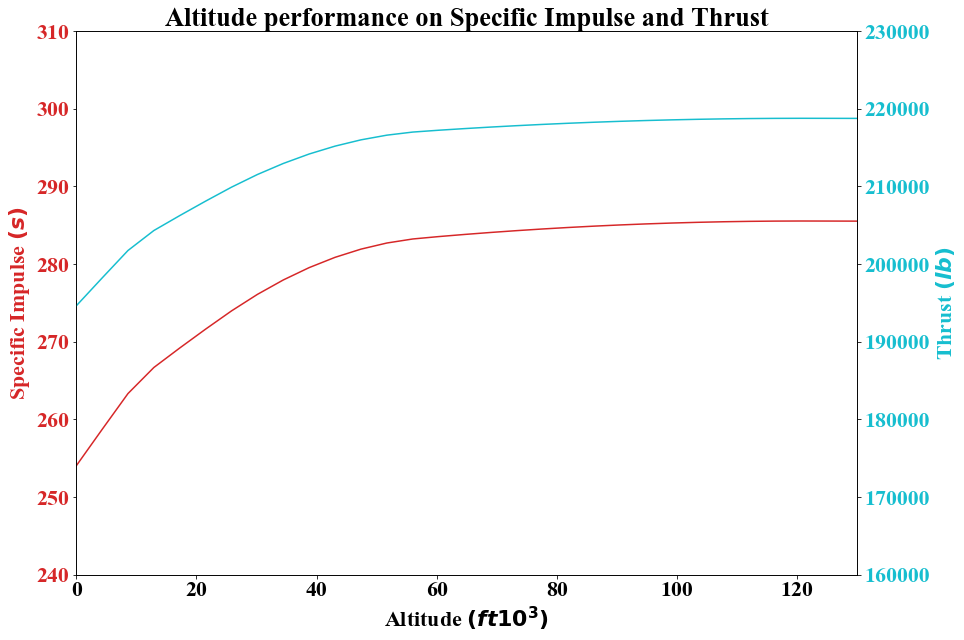

In [66]:
#Homework 2

#Given
P2=8.66   #Pressure | psia (assume constant with altitude)
F=194600  #Sea-level Thrust | lbs
Isp=254   #Specific Impulse Sea-level | seconds
A2=1642   #Area | inches^2
go=32.2   #Gravity| ft/sec^2
P3=14.696 #Standard Sea-level Pressure | psia

#Calculations
C=Isp*go
mdot=F/C                   #Use F and C
wdot=mdot*go               #use mdot and go
V2=(F-((P2-P3)*A2))/mdot   #at sea-level from F, mdot, P2,P3, and A2
#Assume mdot and v2 remain constant with altitude, vary P3 with altitude; Calculate and plot F
#Calculate and plot Specific Impulse at any altitude from F and wdot


Px=P3*np.array([1,8.87*10**-1,6.6919*10**-1,5.3313*10**-1,2.6151*10**-1,2.5158*10**-2,7.8735*10**-4,2.0408*10**-5,3.1593*10**-7,1.2341*10**-8])
Alt=3280.84*np.array([0,1,3,5,10,25,50,75,100,130])
F=mdot*V2+(P2-Px)*A2
Isp=F*(1/wdot)

#Refining Data
Alt_=np.linspace(Alt.min(), Alt.max(), Res)
FNew= make_interp_spline(Alt,F, k=2)
IspNew= make_interp_spline(Alt, Isp, k=2)
F_s=FNew(Alt_)
Isp_s=IspNew(Alt_)
Alt_=Alt_/1000

#Outputs

print("Thrust at altitude:",F)

print("Specific Impulse at altitude:",Isp)

#plt.plot()

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Altitude $(ft10^3)$")
ax1.set_ylabel("Specific Impulse $(s)$", color=color)
ax1.plot(Alt_,Isp_s,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([240, 310])
plt.xlabel("Altitude $(ft10^3)$")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:cyan'
ax2.set_ylabel("Thrust $(lb)$", color=color)  # we already handled the x-label with ax1
ax2.plot(Alt_,F_s,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([160000, 230000])

plt.xlim(0,130)
plt.title("Altitude performance on Specific Impulse and Thrust")
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Homework 3
##Example 3.1
###An "Ideal Rocket Engine" Designed to Operate at Sea-level using Propellents whose k=1.3. Determine the required chamber pressure if M2=2.52. Also determine the Nozzle Area Ratio between the Throat and Exit

In [95]:
#Homework 3

#Given
M2=2.52        #Mach number at Exit | Unitless
k=1.3          #Specific Heat Ratio | Unitless
P=0.1013       #Pressure @ Sea-level | MPa

#Calculations
Po=P*(1+0.5*(k-1)*M2**2)**(k/(k-1))                             #Total Stagnation Pressure or Ideal Chamber Pressure | MPa
ε=(1/M2)*(((1+((k-1)/2)*M2**2)/((k+1)/2))**((k+1)/(2*(k-1))))   #Ideal Nozzle Area Ratio | Unitless

#outputs
print("Ideal Chamber Pressure:",Po,"MPa")
print("Ideal Nozzle Area Ratio:",ε)



Ideal Chamber Pressure: 1.8403275486388506 MPa
Ideal Nozzle Area Ratio: 3.0193113001191674


#Homework 4
##Recreate Figure 3.1 and 3.2

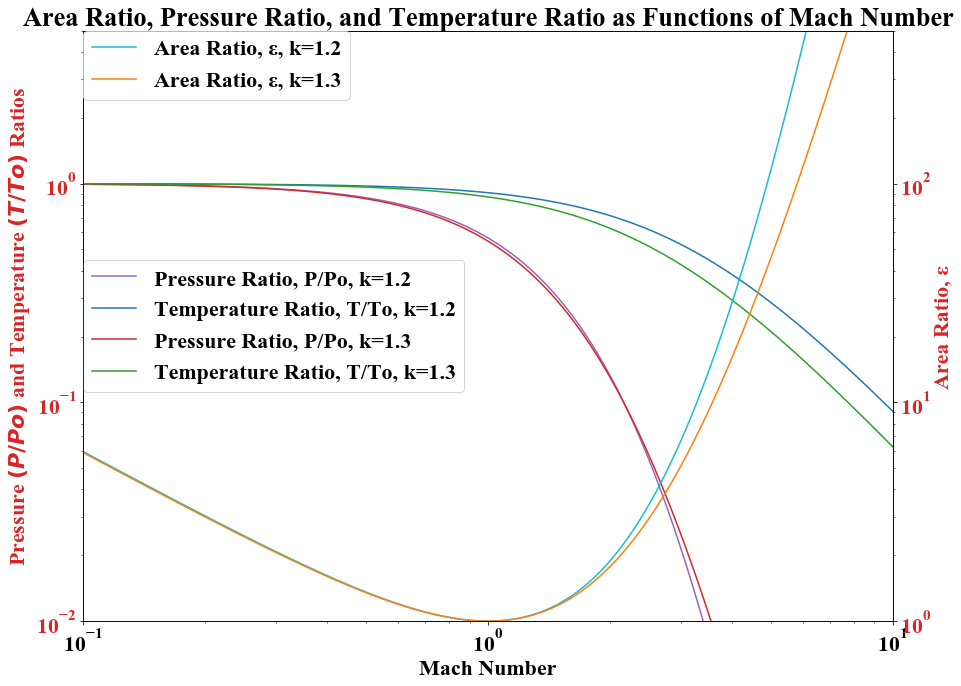

In [139]:
#Homework 4

#Figure 3.1

#Given
k1=1.2
k2=1.3
M=np.arange(0.1,10.1,0.001)


#Calculations
ToT1=(1+0.5*(k1-1)*M**2)                                           #Stagnation Temperature Ratio | k=1.2
PoP1=(1+0.5*(k1-1)*M**2)**(k1/(k1-1))                              #Stagnation Pressure Ratio | k=1.2
TTo1=1/ToT1                                                        #Temperature Ratio | k=1.2
PPo1=1/PoP1                                                        #Pressure Ratio | k=1.2
ε1=(1/M)*(((1+((k1-1)/2)*M**2)/((k1+1)/2))**((k1+1)/(2*(k1-1))))   #Ideal Nozzle Area Ratio | k=1.2
ToT2=(1+0.5*(k2-1)*M**2)                                           #Stagnation Temperature Ratio | k=1.3
PoP2=(1+0.5*(k2-1)*M**2)**(k2/(k2-1))                              #Stagnation Pressure Ratio | k=1.3
TTo2=1/ToT2                                                        #Temperature Ratio | k=1.3
PPo2=1/PoP2                                                        #Pressure Ratio | k=1.3
ε2=(1/M)*(((1+((k2-1)/2)*M**2)/((k2+1)/2))**((k2+1)/(2*(k2-1))))   #Ideal Nozzle Area Ratio | k=1.3



#Plot of Pressure and Temperature Ratios
color='tab:red'
fig,ax1=plt.subplots()
plt.xscale('log')
plt.yscale('log')
ax1.set_xlabel('Mach Number')
ax1.set_ylabel('Pressure $(P/Po)$ and Temperature $(T/To)$ Ratios', color=color)
PR1=ax1.plot(M,PPo1,color='tab:purple',label="Pressure Ratio, P/Po, k=1.2")                #Pressure Ratio | k=1.2
TR1=ax1.plot(M,TTo1,color='tab:blue', label="Temperature Ratio, T/To, k=1.2")               #Temperature Ratio | k=1.2
PR2=ax1.plot(M,PPo2,color='tab:red', label="Pressure Ratio, P/Po, k=1.3")                   #Pressure Ratio | k=1.3
TR2=ax1.plot(M,TTo2,color='tab:green', label="Temperature Ratio, T/To, k=1.3")              #Temperature Ratio | k=1.3
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.01,5])
plt.xlabel('Mach Number')
plt.legend(loc='center left', borderaxespad=0.)

# Plot of Area Ratios
ax2=ax1.twinx()
plt.xscale('log')
plt.yscale('log')
color=color
ax2.set_ylabel('Area Ratio, ε', color=color)
AR1=ax2.plot(M,ε1,color='tab:cyan', label='Area Ratio, ε, k=1.2')                                # Area Ratio | k=1.2
AR2=ax2.plot(M,ε2,color='tab:orange', label='Area Ratio, ε, k=1.3')                              # Area Ratio | k=1.3
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([1.0,500])
plt.xlim(0.10,10)
plt.title('Area Ratio, Pressure Ratio, and Temperature Ratio as Functions of Mach Number')
fig.tight_layout()
plt.legend(loc='best', borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


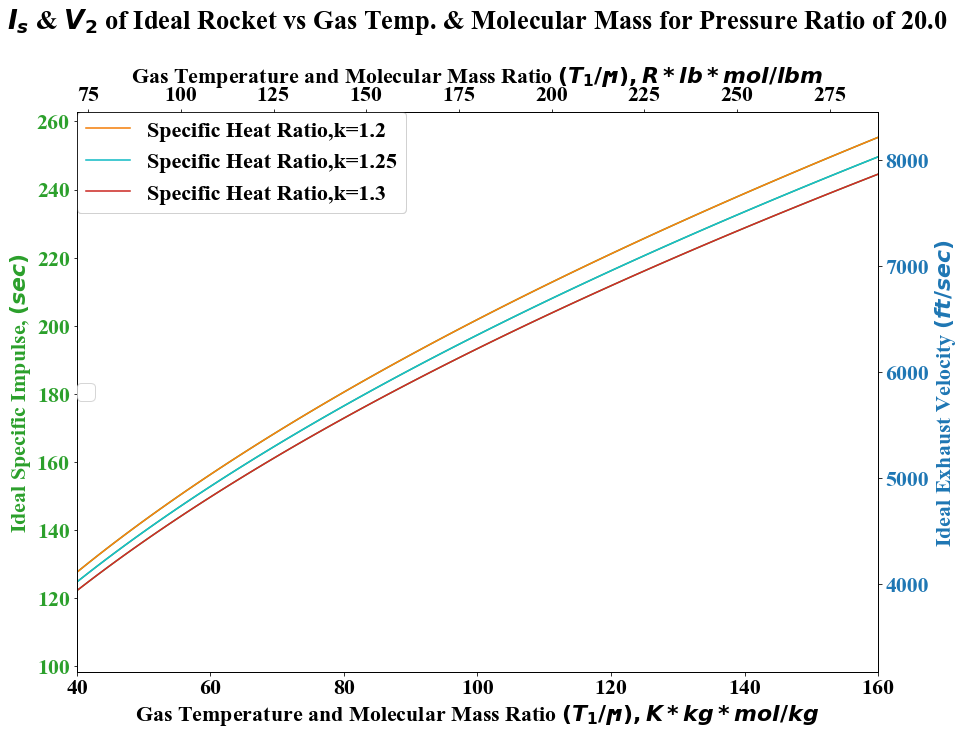

No handles with labels found to put in legend.


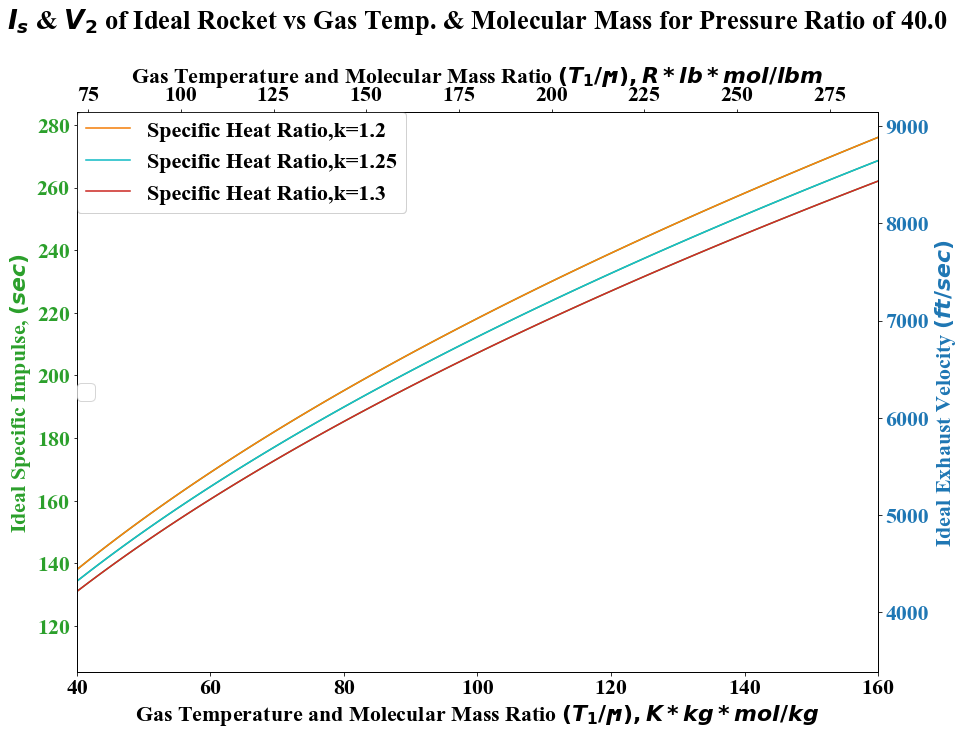

In [140]:
#Homework 4

#Figure 3.2

#Loop for multiple graphs
PR = [20,40] #Pressure Ratios to input | unitless
for P1_P2 in PR:
    #Given
    k1=1.2      #Specific Heat Ratio
    k2=1.25     #Specific Heat Ratio
    k3=1.3      #Specific Heat Ratio
    R_=8.31446  #Universal Gas Constant | J*K-1*mol-1
    T1_ϻ=np.linspace(30000,160000,100) #Creating a range of temperature to molecular mass ratios
    P2_P1=1/P1_P2 #Inversing the pressure ratio
    go=9.81     #Acceleration due to gravity | m/s^2

    #Calculations
    V21=np.sqrt((2*k1)/(k1-1)*R_*T1_ϻ*(1-(P2_P1)**((k1-1)/k1))) #Velocity Equation (3-16) |k=1.2
    V22=np.sqrt((2*k2)/(k2-1)*R_*T1_ϻ*(1-(P2_P1)**((k2-1)/k2))) #Velocity Equation (3-16) |k=1.25
    V23=np.sqrt((2*k3)/(k3-1)*R_*T1_ϻ*(1-(P2_P1)**((k3-1)/k3))) #Velocity Equation (3-16) |k=1.3
    Isp1=V21/go                                               #Calulating Isp from the velocity relationship | k=1.2
    Isp2=V22/go                                               #Calulating Isp from the velocity relationship | k=1.25
    Isp3=V23/go                                               #Calulating Isp from the velocity relationship | k=1.3

    #Conversions
    V21=V21*3.28084 #Converting m/s to ft/s | k=1.2
    V22=V22*3.28084 #Converting m/s to ft/s | k=1.25
    V23=V23*3.28084 #Converting m/s to ft/s | k=1.3



    #Plotting Isp
    fig, ax1 = plt.subplots()
    color = 'tab:green'
    ax1.set_xlabel("$(T_1/ϻ),R*lb*mol/lbm$")
    ax1.set_ylabel("Ideal Specific Impulse, $(sec)$", color=color)
    IR1=ax1.plot(T1_ϻ/1000,Isp1,color=color, label="Specific Heat Ratio,k=1.2")
    IR2=ax1.plot(T1_ϻ/1000,Isp2,color=color, label="Specific Heat Ratio,k=1.25")
    IR3=ax1.plot(T1_ϻ/1000,Isp3,color=color, label="Specific Heat Ratio,k=1.3")
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc='upper left', borderaxespad=0.) #Showing the Graph Legend
    plt.xlabel("Gas Temperature and Molecular Mass Ratio $(T_1/ϻ),K*kg*mol/kg$")
    
    #Plotting V
    ax2 = ax1.twinx()  # Creating a second axis in the plot that shares the x-axis
    color = 'tab:blue'
    ax2.set_ylabel("Ideal Exhaust Velocity $(ft/sec)$", color=color)
    VR1=ax2.plot((T1_ϻ/1000),V21,color='tab:orange', label="Specific Heat Ratio,k=1.2")
    VR2=ax2.plot((T1_ϻ/1000),V22,color='tab:cyan', label="Specific Heat Ratio,k=1.25")
    VR3=ax2.plot((T1_ϻ/1000),V23,color='tab:red', label="Specific Heat Ratio,k=1.3")
    ax2.tick_params(axis='y', labelcolor=color)
    plt.legend(loc='best', borderaxespad=0.) #Showing the Graph Legend
    plt.xlim(40,160)     #Setting the range for the x-axis
    plt.title("$I_s$ & $V_2$ of Ideal Rocket vs Gas Temp. & Molecular Mass for Pressure Ratio of " + str(1/P2_P1)+"\n")
    fig.tight_layout()  #Setting a layout to ensure no clipping of variable names
    ax3 = ax1.twiny()   # Creating a second axis in the plot that shares the y-axis
    plt.xlabel("Gas Temperature and Molecular Mass Ratio $(T_1/ϻ),R*lb*mol/lbm$")
    plt.xlim(72,288)    #Creating a limit on the new x axis
    plt.legend(loc='center left', borderaxespad=0.) #Showing the Graph Legend
    plt.show()          #Printing the plot

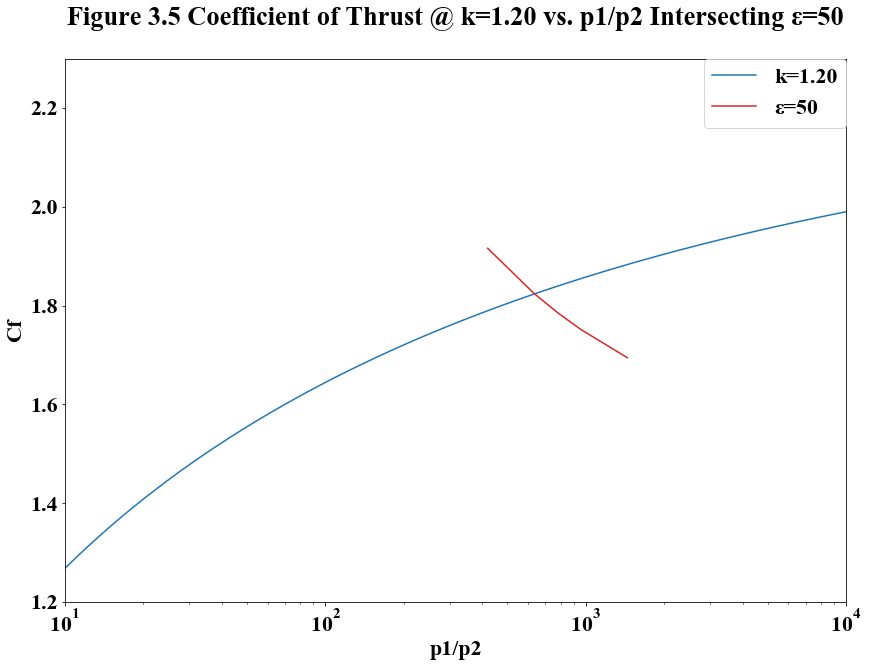

In [166]:
    #Homework 5

    #Figure 3.5
    
def CfIdeal(k,p2p1):
        Cf=(((2*k**2)/(k-1))*(2/(k+1))**((k+1)/(k-1))*(1-(p2p1)**((k-1)/k)))**0.5
        return Cf
def AreaRatio(k,p2p1):
        AR=((k+1)/2)**(1/(k-1))*(p2p1)**(1/k)*(((k+1)/(k-1))*(1-p2p1**((k-1)/k)))**0.5
        AR=AR**-1
        return AR
def FindEpsln(numbers,eps):   
         numbers = np.asarray(numbers) 
         i=(np.abs(numbers - eps)).argmin() 
         return numbers[i]  

        
    #Given
    k=1.20
    Epsln=50
    p1p2=np.arange(10.0,10000.1,0.1)
    p2p1=p1p2**-1
    Cf=CfIdeal(k,p2p1)
        
        
    Cfcoords=[]
    Pcoords=[]
        
    for K in(1.1,1.2,1.25,1.3,1.4):
        AR=AreaRatio(K,p2p1)
        AR=AR.tolist()
        Cfcoords.append(CfIdeal(K,p2p1[AR.index(FindEpsln(AR,50))]))
            
    for K in(1.1,1.2,1.25,1.3,1.4):
        AR=AreaRatio(K,p2p1)
        AR=AR.tolist()
        Pcoords.append(p1p2[AR.index(FindEpsln(AR,50))])
#Plotting the Graph
    fig = plt.subplots()
    color = 'tab:green'
    plt.plot(p1p2,Cf, color='tab:blue',label='k=1.20')
    plt.plot(Pcoords,Cfcoords,color='tab:red',label='ε=50')
    plt.legend(loc='upper left', borderaxespad=0.) #Showing the Graph Legend
    plt.xlabel('p1/p2')
    plt.ylabel('Cf')
    plt.legend(loc='best', borderaxespad=0.) #Showing the Graph Legend
    plt.xlim([10,10000])#Setting the range for the x-axis
    plt.xscale('log')
    plt.ylim([1.2,2.3])
    plt.title('Figure 3.5 Coefficient of Thrust @ k=1.20 vs. p1/p2 Intersecting ε=50\n')
    plt.show()